# Medical Insurance Cost Prediction Project Report
---
## Project Overview
This project aims to predict medical insurance charges based on demographic and health-related features using machine learning models. The dataset contains information about individuals, including their age, sex, BMI, number of children, smoking status, and region. The target variable is the insurance charges.

## Data Description
- **age**: Age of the individual (integer)
- **sex**: Gender of the individual (male/female)
- **bmi**: Body Mass Index (float)
- **children**: Number of children/dependents (integer)
- **smoker**: Smoking status (yes/no)
- **region**: Residential area (southeast, southwest, northeast, northwest)
- **charges**: Medical insurance cost (float, target variable)

The dataset is clean, with no missing values. Categorical features are encoded using LabelEncoder for model compatibility.

## Data Analysis & Visualization
- Distribution plots and boxplots were used to understand the spread and detect outliers in numerical features.
- Count plots and value counts were used for categorical features to visualize their distribution.
- Outliers in BMI and charges were handled using the IQR method.

## Data Preprocessing
- Categorical variables (sex, smoker, region) were encoded.
- Outliers were capped using the IQR method.
- Features and target were split into `x` and `y`.
- Data was split into training and testing sets (80/20 split).
- Numerical features were scaled using RobustScaler.

## Model Training & Evaluation
Two models were trained and evaluated:
1. **Linear Regression**:
    - Trained on the processed data.
    - Performance measured using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.
2. **Random Forest Regressor**:
    - An ensemble model for regression tasks.
    - Also evaluated using MSE, MAE, and R² score.

## Results
- Both models were tested on the test set.
- Evaluation metrics (MSE, MAE, R²) were printed for comparison.
- Random Forest generally provides better performance due to its ability to capture non-linear relationships.

## Prediction System
- A simple prediction system was built to estimate insurance charges for new input data using both models.
- Input features are encoded and passed to the trained model to predict charges.



---

## Data Explanation
The medical insurance dataset contains the following columns:
- **age**: The age of the insured individual. Ranges from young adults to seniors.
- **sex**: Gender of the individual, either male or female.
- **bmi**: Body Mass Index, a measure of body fat based on height and weight. Higher values may indicate overweight or obesity.
- **children**: Number of children/dependents covered by the insurance.
- **smoker**: Indicates whether the person is a smoker (yes) or non-smoker (no). Smoking status is a major factor affecting insurance charges.
- **region**: The residential area of the individual. The dataset includes four regions: southeast, southwest, northeast, and northwest. Regional differences may affect healthcare costs.
- **charges**: The actual medical insurance cost billed to the individual. This is the target variable for prediction.

### Key Points
- **No missing values**: The dataset is complete and does not require imputation.
- **Categorical encoding**: Sex, smoker, and region are encoded numerically for model training.
- **Outliers**: BMI and charges columns may contain outliers, which are handled using the IQR method.
- **Feature importance**: Age, BMI, and smoking status are typically the most influential features in predicting insurance charges.

This dataset is suitable for regression analysis and helps demonstrate how demographic and lifestyle factors impact medical insurance costs.

import lib

In [179]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')

### data collection and analysis 

##### read the data 

In [180]:
incurance_dataset = pd.read_csv(r'C:\Users\NILE NEW\Desktop\python\projects\medical incurance\insurance.csv')

In [181]:
# get the first five rows 
incurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [182]:
# get the shape of the data frame 
incurance_dataset.shape 

(1338, 7)

In [183]:
# get the some info about the data 
incurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


the categorecal values
- region
- smoker
- sex

the target value is  -->  charges 

In [184]:
# check for the missing values 
incurance_dataset.isnull().sum()  # no missing 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [185]:
# check for duplicates 
incurance_dataset.duplicated().value_counts()
# get rid of the duplicates 
incurance_dataset.drop_duplicates(inplace= True)

In [186]:
incurance_dataset.duplicated().value_counts()

False    1337
Name: count, dtype: int64

## perform some data analysis

In [187]:
# get some numercal info about the data 
incurance_dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


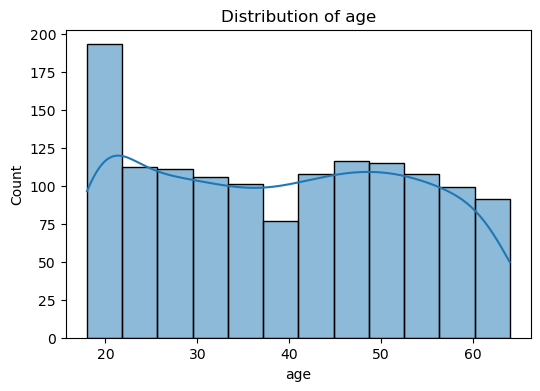

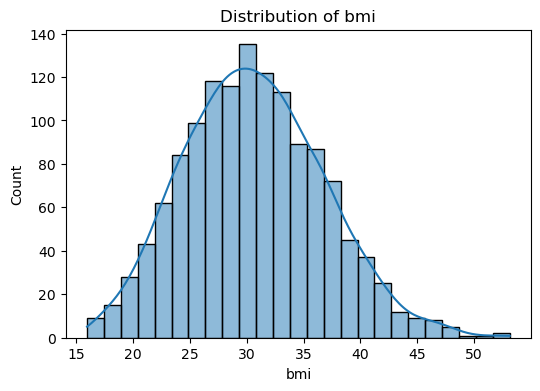

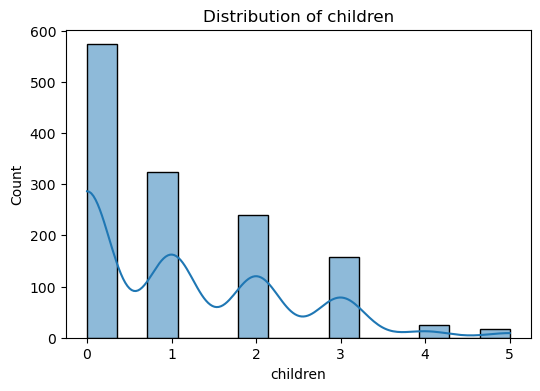

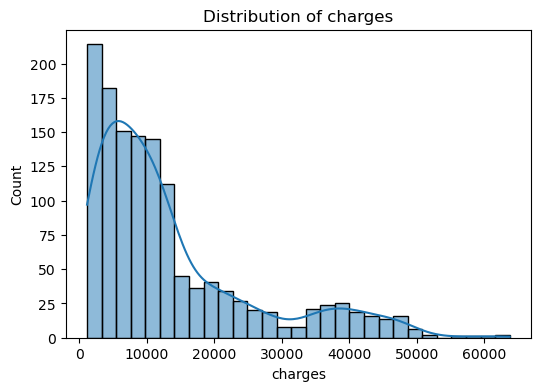

In [188]:
# make some distribution plots for the numerical columns 
for col in incurance_dataset.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(incurance_dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

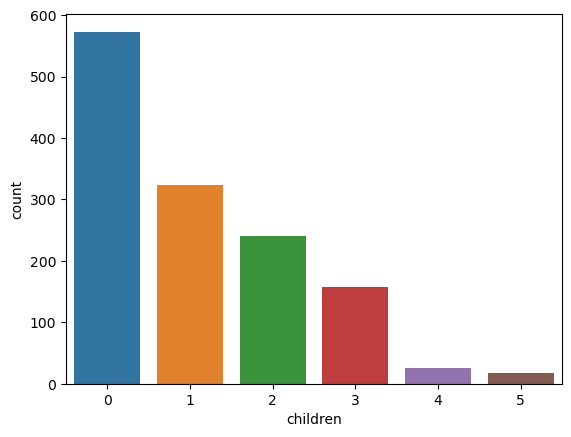

In [189]:
# count plot for the children column 
sns.countplot(x='children',data=incurance_dataset)
plt.show() 

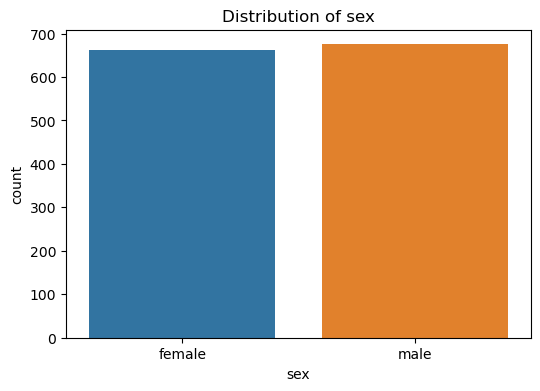

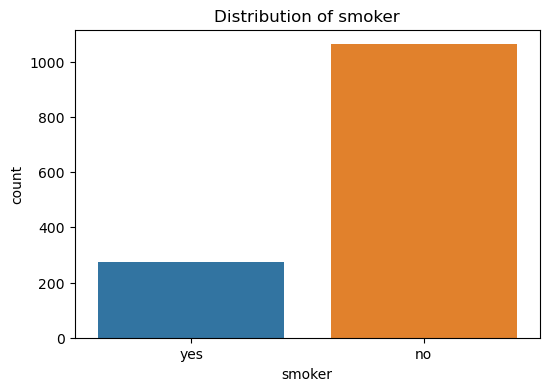

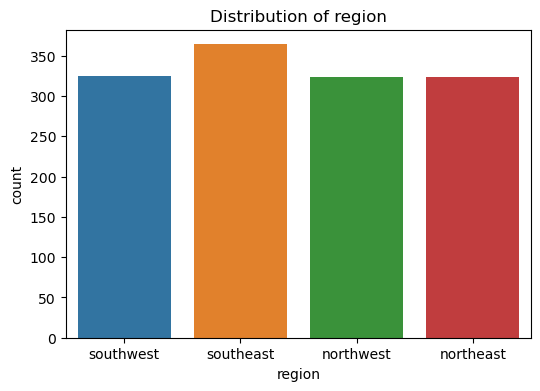

In [190]:
# make some distribution plots for the categorical columns 
for col in incurance_dataset.select_dtypes(include='object').columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=incurance_dataset[col] , data  = incurance_dataset) 
    plt.title(f'Distribution of {col}')
    plt.show()

In [191]:
# get the value counts for the categorical columns
for col in incurance_dataset.select_dtypes(include='object').columns: 
    print(f'Value count for {col} : ')
    print(incurance_dataset[col].value_counts())
    print('\n')

Value count for sex : 
sex
male      675
female    662
Name: count, dtype: int64


Value count for smoker : 
smoker
no     1063
yes     274
Name: count, dtype: int64


Value count for region : 
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64




### Data preprocessing 

encoding the categorical values 

In [192]:
from sklearn.preprocessing import LabelEncoder

sex = LabelEncoder()
smoker = LabelEncoder()
region = LabelEncoder()

incurance_dataset['sex'] = sex.fit_transform(incurance_dataset['sex'])
incurance_dataset['smoker'] = smoker.fit_transform(incurance_dataset['smoker'])
incurance_dataset['region'] = region.fit_transform(incurance_dataset['region'])

# # encoding sex column
# incurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# 3 # encoding 'smoker' column
# incurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# # encoding 'region' column
# incurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)



In [193]:
incurance_dataset.head()  

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


detect outlier 

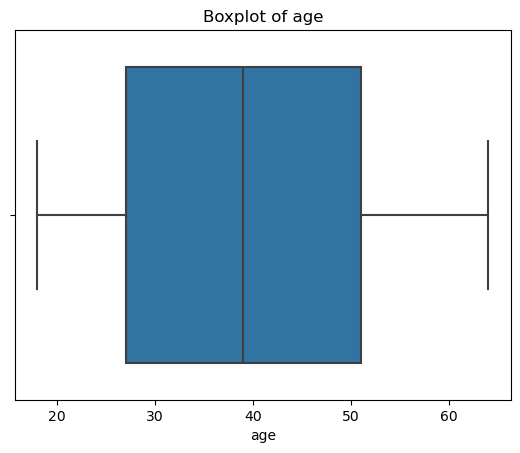

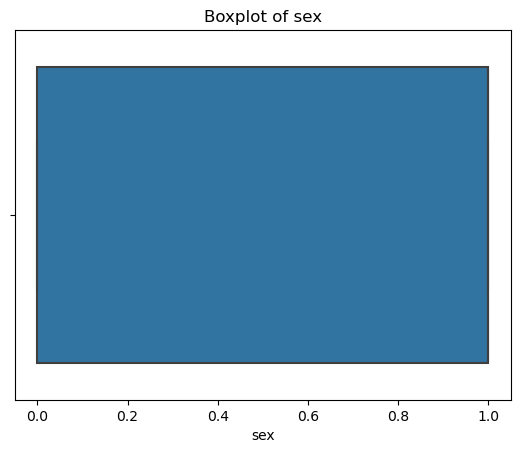

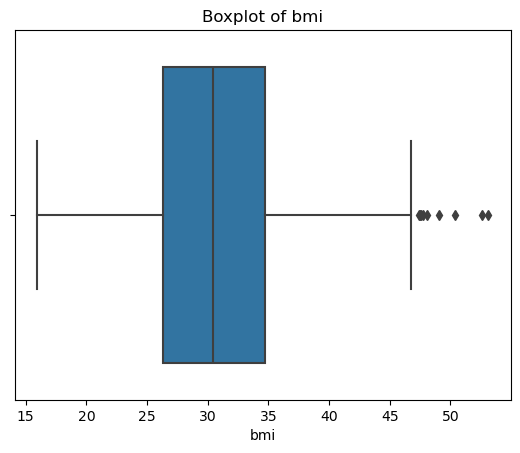

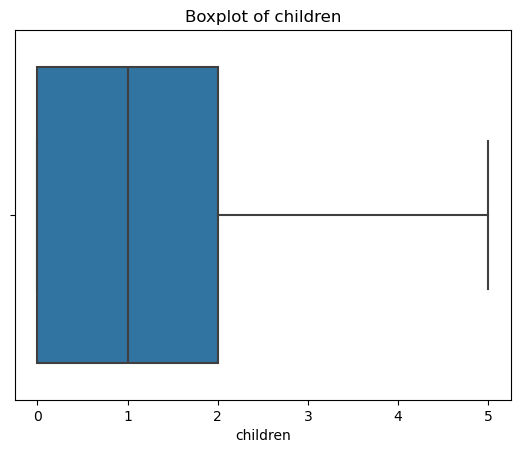

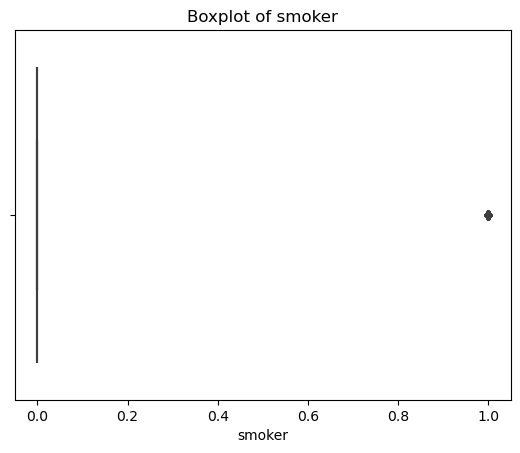

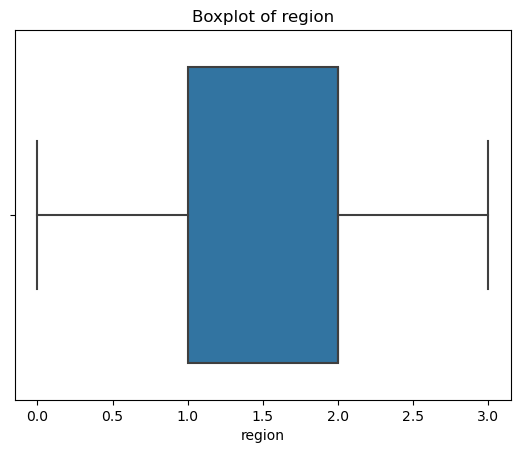

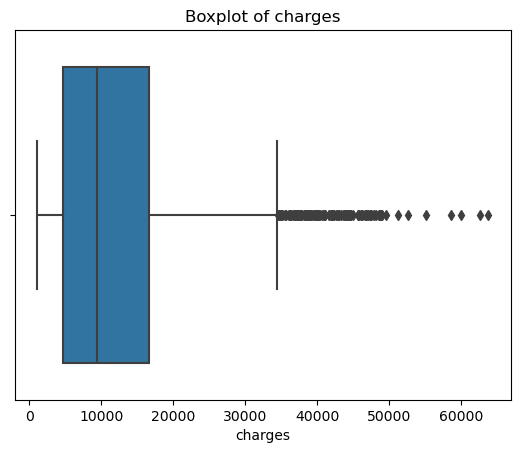

In [194]:
for col in incurance_dataset.select_dtypes(include=np.number).columns:
  sns.boxplot(x=incurance_dataset[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

splitting the features and target 


In [195]:
x= incurance_dataset.drop(columns='charges', axis=1)
y = incurance_dataset.charges
display(x.head())
display(y.head())

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Train & Test Splitting

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2 , random_state=10)


In [197]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(1069, 6)

(268, 6)

(1069,)

(268,)

scalling the numerical data

In [198]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

numerical_cols = x.select_dtypes(include=np.number).columns

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test_scaled[numerical_cols] = scaler.transform(x_test[numerical_cols])

x_train_scaled.head()


,age,sex,bmi,children,smoker,region
982,-0.32,0.0,-0.535236,1.0,1.0,1.0
907,0.20,-1.0,0.214910,0.0,0.0,0.0
22,-0.84,0.0,0.419918,-0.5,0.0,0.0
1261,-0.44,0.0,0.769365,0.0,0.0,1.0
1065,0.12,-1.0,-0.605125,0.0,0.0,1.0


### train the model 

In [199]:
regressor  = LinearRegression() 


In [200]:
regressor.fit(x_train,y_train)

LinearRegression()

test the model 

In [201]:
y_predicted = regressor.predict(x_test)

In [202]:
y_predicted

array([ 4124.8158189 ,  4330.3240549 , 11752.05004143, 12003.73128724,
       33453.62994737,  6096.12087338, 11906.85964219,  3757.43109318,
       37677.19153412, 15505.89017986,  9782.1094319 ,  3117.20708728,
        4354.17969275, 30565.437108  , 34228.46475491, 30241.72518994,
        5562.11959692,  8907.09448607,  6252.1495059 ,  5609.51929559,
       28052.31420172,  9628.21959909, 27526.13236034,  8203.71968417,
        6784.51089309,  4578.50977953, 32577.95464079,  9020.35354246,
        6814.25087191,  7133.98523832,  7891.28384523, 10649.12428539,
       11895.63959826,  9405.55477689,  8188.785719  , 10781.90009194,
       14563.23745912,  8398.14633779, 13795.72753533, 11518.29275496,
        1134.93130348, 30780.93656227,  5848.90215639,  2363.79732949,
       10657.90504357, 14280.70115308, 13346.13001902, 36139.79573867,
       35063.46386455,   895.83829659, 11588.83842061, 14082.01850106,
        9405.01905973, 37361.88032157, 12466.23173579, 10375.11147779,
      

calculate the test square error 

In [203]:
mean_squared_error(y_test,y_predicted)

35907174.73038728

In [204]:
mean_absolute_error(y_test,y_predicted)

4045.2470168886575

get the accuracy of the model 

In [205]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predicted)
print(f"Model Accuracy (R² score): {accuracy:.4f}")

Model Accuracy (R² score): 0.7347


bullding a predicator system 

In [ ]:
# using the linear regression 
import pandas as pd
import numpy as np
raw_input = {
    'age': 60,
    'sex': 'female',
    'bmi': 36.005,
    'children': 0,
    'smoker': 'no',
    'region': 'northeast'
}
    #60,female,36.005,0,no,northeast,13228.84695

input_df = pd.DataFrame([raw_input])
input_df['sex'] = sex.transform(input_df['sex'])
input_df['smoker'] = smoker.transform(input_df['smoker'])
input_df['region'] = region.transform(input_df['region'])
predicted_charge = regressor.predict(input_df)
print(f"The predicted insurance charge for the input data is: ${predicted_charge[0]:.2f}")


The predicted insurance charge for the input data is: $15410.88


usning the random forest regressor 

In [207]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

y_rf_predicted = rf_regressor.predict(x_test)

print('Random Forest Mean Squared Error:', mean_squared_error(y_test, y_rf_predicted))
print('Random Forest Mean Absolute Error:', mean_absolute_error(y_test, y_rf_predicted))
rf_r2 = r2_score(y_test, y_rf_predicted)
print(f" (R² score): {rf_r2:.4f}")

Random Forest Mean Squared Error: 27204131.20069832
Random Forest Mean Absolute Error: 2872.5396235522394
 (R² score): 0.7990


In [208]:
import pandas as pd
import numpy as np
raw_input = {
    'age': 60,
    'sex': 'female',
    'bmi': 36.005,
    'children': 0,
    'smoker': 'no',
    'region': 'northeast'

    #60,female,36.005,0,no,northeast,13228.84695
}
input_df = pd.DataFrame([raw_input])
input_df['sex'] = sex.transform(input_df['sex'])
input_df['smoker'] = smoker.transform(input_df['smoker'])
input_df['region'] = region.transform(input_df['region'])
predicted_charge = rf_regressor.predict(input_df)
print(f"The predicted insurance charge for the input data is: ${predicted_charge[0]:.2f}")

The predicted insurance charge for the input data is: $13129.58
